# Assignment 2

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, panda, etc. where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs. 

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test, correspondingly.
    
#### And show some training images by visualising a few images from the training set.

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


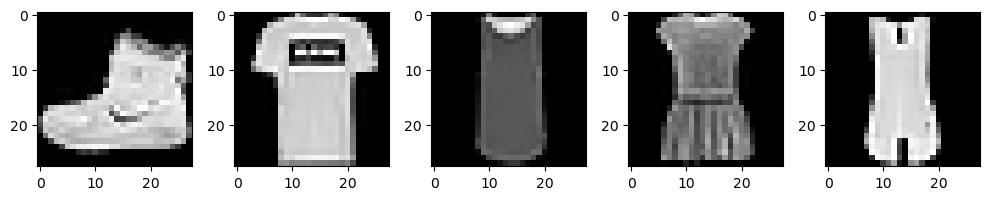

In [1]:
import mnist_reader
# import numpy as np
import matplotlib.pyplot as plt

X_train, y_train = mnist_reader.load_mnist('/Users/swapnilbhattacharya/Desktop/PDS Assignment/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/Users/swapnilbhattacharya/Desktop/PDS Assignment/data/fashion', kind='t10k')

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

# X_train.shape, y_train.shape, X_test.shape, y_train.shape


x_train_normal = X_train.reshape(-1, 28, 28)
x_test_normal = X_test.reshape( -1, 28, 28)


num = 5
plt.figure(figsize=(10,20))
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.imshow(x_train_normal[i], cmap='gray')
    # plt.axis("off")
    
plt.tight_layout()
plt.show()



#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



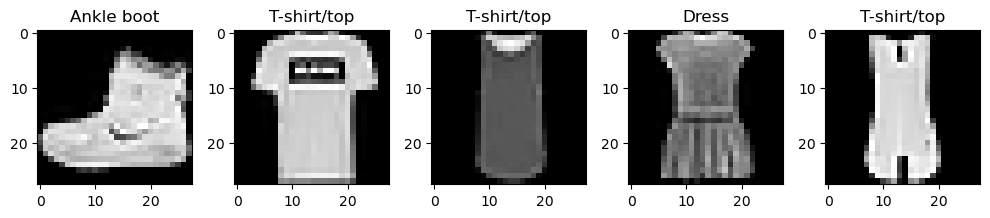

In [2]:

labelnDescription = {
                0: 'T-shirt/top',
                1: 'Trouser',
                2: 'Pullover',
                3: 'Dress',
                4: 'Coat',
                5: 'Sandal',
                6: 'Shirt',
                7: 'Sneaker',
                8: 'Bag',
                9: 'Ankle boot'
}    #From the github site linked above

num = 5
plt.figure(figsize=(10,20))
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.title(labelnDescription[y_train[i]])
    plt.imshow(x_train_normal[i], cmap= "gray")
    
plt.tight_layout()
plt.show()

#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

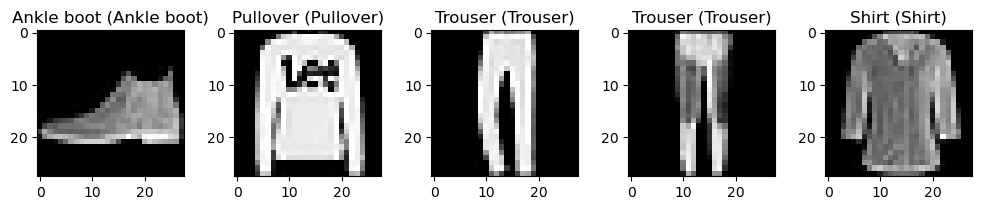

Accuracy:  85.72999999999999 %


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Since pixel intensities range from 0-255, dividing the reshaped array by 255.0 improves performance as we bring down the range to 0 to 1

x_train_reshaped = X_train.reshape(-1, 28*28) / 255.0    # Why not? 20,000 to check system's performance.
y_train_reshaped = y_train.reshape(-1,)                  

x_test_reshaped = X_test.reshape(-1, 28*28) / 255.0
y_test_reshaped = y_test.reshape(-1,)


svm_classifier = SVC(kernel = "linear", C = 0.025)
svm_classifier.fit(x_train_reshaped, y_train_reshaped)
svm_predict = svm_classifier.predict(x_test_reshaped)

num = 5
plt.figure(figsize=(10, 2))

for i in range(num):
    plt.subplot(1, num, i+1)
    pred_category = labelnDescription[svm_predict[i]]
    true_category = labelnDescription[y_test_reshaped[i]]
    plt.title(f"{pred_category} ({true_category})")
    plt.imshow(X_test[i].reshape(28,28), cmap = "gray")
    
    
plt.tight_layout()
plt.show()
accu_score = accuracy_score(y_test_reshaped, svm_predict)
print("Accuracy: ", accu_score*100, "%")  #85.73% Accuracy

#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

10K MLP Results
Accuracy: 84.31 %


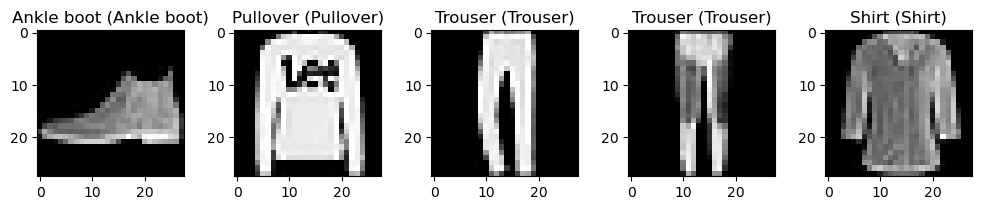

Full Set MLP Results: 
Accuracy:  85.32 %


In [3]:
from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

x_train_shaped = X_train[:10000].reshape(-1, 28*28) / 255.0
y_train_shaped = y_train[:10000]
x_test_flatten = X_test / 255.0

mlpClassifier = MLPClassifier(max_iter=1000, alpha=1)
mlpClassifier.fit(x_train_shaped, y_train_shaped)

predicts = mlpClassifier.predict(x_test_flatten)
accu_score = accuracy_score(y_test, predicts)
print("10K MLP Results")
print("Accuracy:", accu_score*100, "%")           #75% Accuracy

num = 5
plt.figure(figsize = (10,2))

for i in range(num):
    plt.subplot(1, num, i+1)
    predict_class = labelnDescription[predicts[i]]
    true_class = labelnDescription[y_test[i]]
    plt.title(f"{predict_class} ({true_class})")
    plt.imshow(X_test[i].reshape(28, 28), cmap = "gray")
    
plt.tight_layout()
plt.show()

x_full = X_train.reshape(-1, 28*28) / 255.0
y_full = y_train

mlpClassifier.fit(x_full, y_full)
predict_full = mlpClassifier.predict(x_test_flatten)

print("Full Set MLP Results: ")
accu_score1 = accuracy_score(y_test, predict_full)
print("Accuracy: ", accu_score1*100,"%")               #71% Accuracy 


#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics. 

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

Shapes for sobel edge detector
(10000, 784)
(10000, 784)
(60000,)


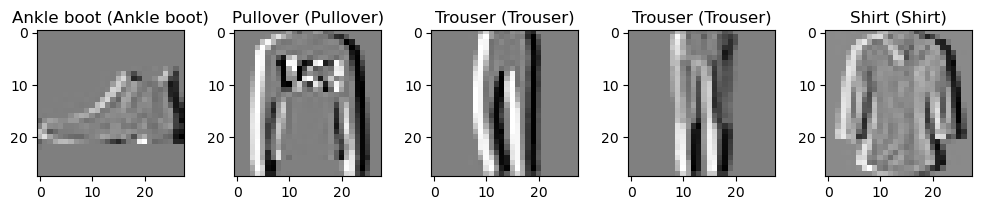

              precision    recall  f1-score   support

           0       0.09      0.10      0.09       942
           1       0.11      0.10      0.11      1027
           2       0.10      0.10      0.10      1016
           3       0.12      0.12      0.12      1019
           4       0.11      0.12      0.11       974
           5       0.10      0.10      0.10       989
           6       0.10      0.08      0.09      1021
           7       0.11      0.11      0.11      1022
           8       0.10      0.11      0.10       990
           9       0.09      0.09      0.09      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000
Shapes for bilateral filter
(60000, 784, 1)
(10000, 784, 1)
(60000,)
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1000
           1       0.94      0.96      0.95      1000
          

In [5]:
import matplotlib.pyplot as plt
from skimage.filters import sobel
import numpy as np
from sklearn.neural_network import MLPClassifier
import cv2
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



x_train_flatten =  X_train[:10000] / 255.0
x_test_flatten = X_test[:10000] / 255.0
X_train_sobel = np.array([sobel(img) for img in x_train_flatten])
X_test_sobel = np.array([sobel(img) for img in x_test_flatten])
X_test_sobel_reshaped = X_test_sobel.reshape(-1,784)


print("Shapes for sobel edge detector")
print(X_train_sobel.shape)
print(X_test_sobel.shape)
print(y_train.shape)

mlpClassifier_sobel = MLPClassifier(max_iter=1000, alpha=1)
y_train_reshaped = y_train[:10000]
mlpClassifier_sobel.fit(X_train_sobel.reshape(-1, 784), y_train_reshaped)

y_predict_sobel = mlpClassifier_sobel.predict(X_test_sobel_reshaped)

num = 5
plt.figure(figsize=(10, 2))
for i in range(num):
    img = plt.subplot(1, num, i + 1)
    prediction = labelnDescription[y_predict_sobel[i]]
    ground_truth_label = labelnDescription[y_test[i]]
    plt.title(f"{prediction} ({ground_truth_label})")
    plt.imshow(X_test_sobel[i].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

print(classification_report(y_train_reshaped, y_predict_sobel))


# Bilateral filter
X_train_bilateral_filter = np.array([cv2.bilateralFilter(img, 9, 85, 85) for img in X_train])
X_test_bilateral_filter = np.array([cv2.bilateralFilter(img, 9, 85, 85) for img in X_test])

X_train_bilateral_filter_reshaped = X_train_bilateral_filter.reshape(-1, 784)
X_test_bilateral_filter_reshaped = X_test_bilateral_filter.reshape(-1, 784)

print("Shapes for bilateral filter")
print(X_train_bilateral_filter.shape)
print(X_test_bilateral_filter.shape)
print(y_train.shape)

mlpClassifier_bilateral = MLPClassifier(max_iter=1000, alpha=1)
mlpClassifier_bilateral.fit(X_train_bilateral_filter_reshaped, y_train)

y_predict_bilateral = mlpClassifier_bilateral.predict(X_test_bilateral_filter_reshaped)
accu_score = accuracy_score(y_test, y_predict_bilateral )

print(classification_report(y_test, y_predict_bilateral))      # 83%
print("Accuracy Score: ", accu_score*100, "%")